#### General setup.
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

%matplotlib inline

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 4)

<br>

#### Loading the data.
___

In [3]:
# unzip the file containing data
zipfile.ZipFile('../Data/names.zip').extractall('.')

In [4]:
# list all files
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
# checking oone of the files
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [6]:
# loading the same file with pandas
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [7]:
# creating a list of data from all files by year
names_all = []

for year in range(1880, 2015):
    names_all.append(pd.read_csv(f'names/yob{year}.txt', names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year
    
# feeding the list to pandas     
all_years = pd.concat(names_all)

In [8]:
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [9]:
all_years.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


<br>

#### Popularity.
___

In [10]:
# add a multiindex to the data set
all_years_indexed = all_years.set_index(['sex', 'name', 'year']).sort_index()
all_years_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [11]:
# select all data for Mary
all_years_indexed.loc['F', 'Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [12]:
def plot_name(sex, name):
    """ Function to plot a name by index """
    data = all_years_indexed.loc[sex,name]
    
    plt.plot(data.index, data.values)
    plt.title(name)

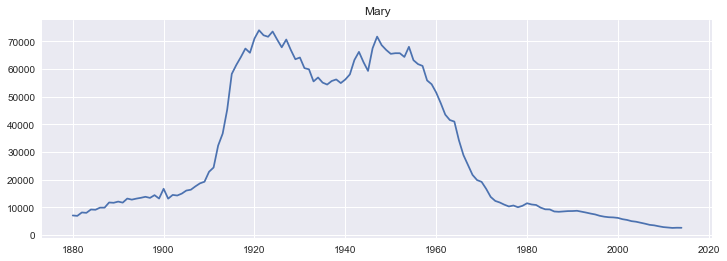

In [13]:
plot_name('F', 'Mary')

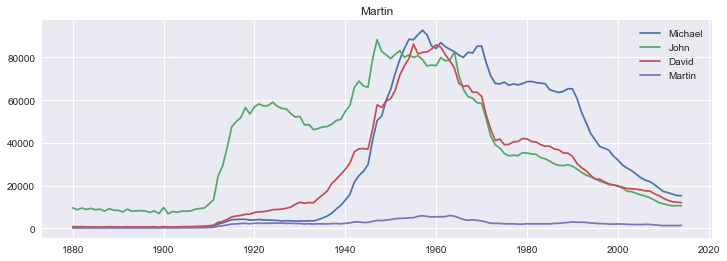

In [14]:
# plot for name popularity for each male name below.
names = ['Michael', 'John', 'David', 'Martin']

for name in names:
    plot_name('M', name)

plt.legend(names);

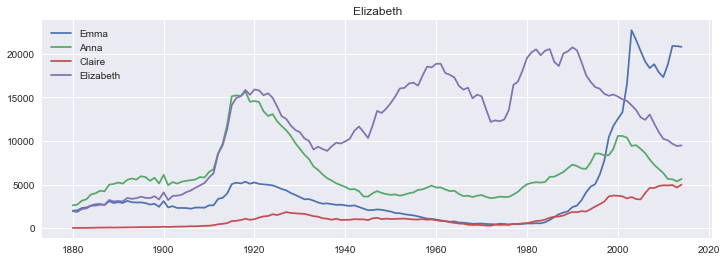

In [15]:
# same for females
names = ['Emma', 'Anna', 'Claire', 'Elizabeth']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

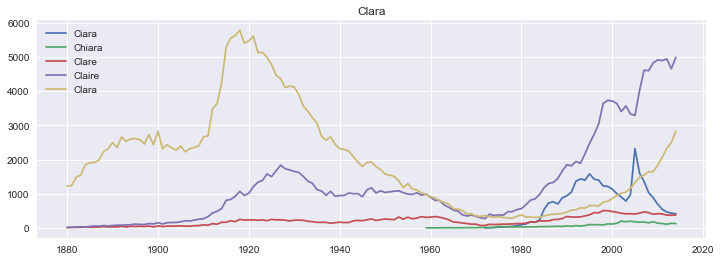

In [16]:
# the same for variants for name 'Claire'
names = ['Ciara', 'Chiara', 'Clare', 'Claire', 'Clara']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

In [17]:
# check the data set for the variants
all_years_indexed.loc['F'].loc[names].head()

number
name  year        
Ciara 1972       5
      1974      16
      1975      26
      1976      26
      1977      36

In [18]:
# unstack it 
all_years_indexed.loc['F'].loc[names].unstack(level=0).head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    NaN    NaN  15.0   21.0  1226.0
1881    NaN    NaN  20.0   23.0  1242.0
1882    NaN    NaN  21.0   30.0  1490.0
1883    NaN    NaN  22.0   38.0  1548.0
1884    NaN    NaN  38.0   33.0  1852.0

In [19]:
# and fill NaN values with zeros
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)
variants.head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    0.0    0.0  15.0   21.0  1226.0
1881    0.0    0.0  20.0   23.0  1242.0
1882    0.0    0.0  21.0   30.0  1490.0
1883    0.0    0.0  22.0   38.0  1548.0
1884    0.0    0.0  38.0   33.0  1852.0

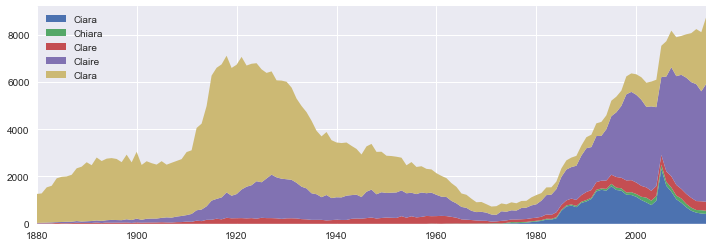

In [20]:
# plot the data with stackplot
plt.stackplot(variants.index, variants.values.T)
plt.legend(names, loc=2)
plt.xlim(1880, 2014);

<br>

#### A yearly top ten.
___

In [21]:
# select all male names for 2008 and sort them by number
pop2008 = all_years_indexed.loc['M', :, 2008].sort_values('number', ascending=False).head(10)
pop2008

number
sex name        year        
M   Jacob       2008   22568
    Michael     2008   20590
    Ethan       2008   20196
    Joshua      2008   19186
    Daniel      2008   18985
    Alexander   2008   18679
    William     2008   18380
    Anthony     2008   18378
    Christopher 2008   17928
    Matthew     2008   17573

In [22]:
# Drop sex and year columns
pop2008.reset_index().drop(['sex', 'year'], axis=1)

,name,number
0,Jacob,22568
1,Michael,20590
2,Ethan,20196
3,Joshua,19186
4,Daniel,18985
5,Alexander,18679
6,William,18380
7,Anthony,18378
8,Christopher,17928
9,Matthew,17573


In [23]:
def top_ten(sex, year):
    """ Function to select top ten names in any years """
    
    data = all_years_indexed.loc[sex, :, year].sort_values('number', ascending=False)
    data = data.reset_index().drop(['sex','year', 'number'],axis=1).head(10)
    
    data.index = data.index + 1
    data.columns = [year]
    
    return data

In [24]:
top_ten('F',2008)

,2008
1,Emma
2,Isabella
3,Emily
4,Olivia
5,Ava
6,Madison
7,Sophia
8,Abigail
9,Elizabeth
10,Chloe


In [25]:
def top_tens(sex, year_start, year_end):
    """ Top ten for a range of years """
    
    years = [top_ten(sex, year) for year in range(year_start, year_end+1)]
    return years[0].join(years[1:])

In [26]:
top_tens('F', 2000, 2008)

,2000,2001,2002,2003,2004,2005,2006,2007,2008
1,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emma
2,Hannah,Madison,Madison,Emma,Emma,Emma,Emma,Isabella,Isabella
3,Madison,Hannah,Hannah,Madison,Madison,Madison,Madison,Emma,Emily
4,Ashley,Ashley,Emma,Hannah,Olivia,Abigail,Isabella,Ava,Olivia
5,Sarah,Alexis,Alexis,Olivia,Hannah,Olivia,Ava,Madison,Ava
6,Alexis,Sarah,Ashley,Abigail,Abigail,Isabella,Abigail,Sophia,Madison
7,Samantha,Samantha,Abigail,Alexis,Isabella,Hannah,Olivia,Olivia,Sophia
8,Jessica,Abigail,Sarah,Ashley,Ashley,Samantha,Hannah,Abigail,Abigail
9,Elizabeth,Elizabeth,Samantha,Elizabeth,Samantha,Ava,Sophia,Hannah,Elizabeth
10,Taylor,Olivia,Olivia,Samantha,Elizabeth,Ashley,Samantha,Elizabeth,Chloe


In [27]:
top_tens('M', 2000, 2008)

,2000,2001,2002,2003,2004,2005,2006,2007,2008
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew


In [28]:
# select data for female names from 2000 to 2008 and stack it
top_tens('F', 2000, 2008).stack().head()

1  2000    Emily
   2001    Emily
   2002    Emily
   2003    Emily
   2004    Emily
dtype: object

In [29]:
# count the number of occurrences
popular = top_tens('F', 2000, 2008).stack().value_counts()
popular

Madison      9
Emily        9
Hannah       8
Olivia       8
Abigail      8
Samantha     7
Emma         7
Ashley       6
Elizabeth    6
Isabella     5
Ava          4
Alexis       4
Sophia       3
Sarah        3
Jessica      1
Chloe        1
Taylor       1
dtype: int64

In [30]:
# select the top 6
top6 = popular.index[:6]
top6

Index(['Madison', 'Emily', 'Hannah', 'Olivia', 'Abigail', 'Samantha'], dtype='object')

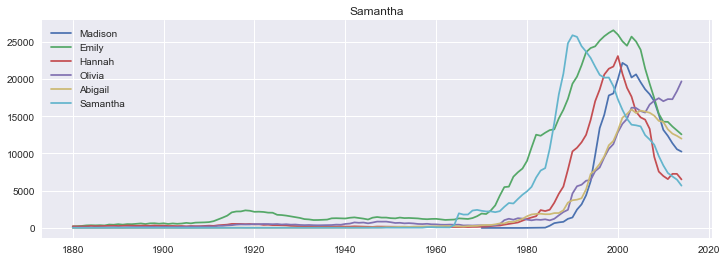

In [31]:
# plot them
for name in top6:
    plot_name('F', name)

plt.legend(top6);

<br>

#### Fads.
___

In [32]:
# total number of occurrences of each name
totals = all_years.groupby(['sex', 'name'])['number'].sum()
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [33]:
def sumsq(x):
    """ Function to compute sum of squares """
    return sum(x**2)

In [34]:
# calculate spikyness of the data
spikyness = all_years.groupby(['sex','name'])['number'].agg(sumsq) / totals**2 
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [35]:
# select only names that appear frequently
spiky_common = spikyness[totals > 5000].copy()
spiky_common.sort_values(ascending=False, inplace=True)

# select the spikiest names
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [36]:
# select the least spiky names
spiky_common.tail(10)

sex  name   
F    Minerva    0.008853
     Nina       0.008752
     Celia      0.008639
M    Will       0.008635
     Hiram      0.008618
F    Rosa       0.008512
     Mollie     0.008437
M    Ike        0.008310
F    Delia      0.008263
     Louisa     0.007931
Name: number, dtype: float64

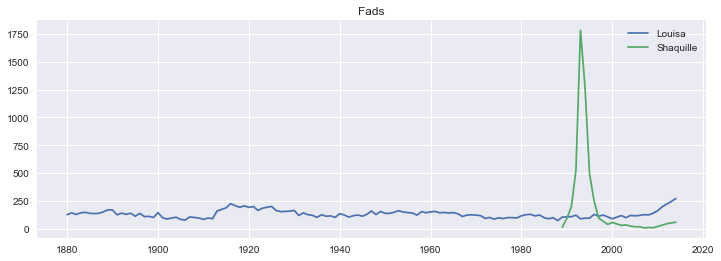

In [37]:
# Plot data for most and least spikiest names
plot_name('F', 'Louisa')
plot_name('M', 'Shaquille')
plt.legend(['Louisa', 'Shaquille'])
plt.title('Fads');

In [38]:
# select 10 fads (the most spikiest names)
fads = spiky_common.head(10).index.values
fads

array([('M', 'Iker'), ('M', 'Shaquille'), ('M', 'Jase'), ('F', 'Adalynn'),
       ('F', 'Harper'), ('M', 'Brantley'), ('F', 'Arya'),
       ('M', 'Bentley'), ('F', 'Miley'), ('F', 'Paisley')], dtype=object)

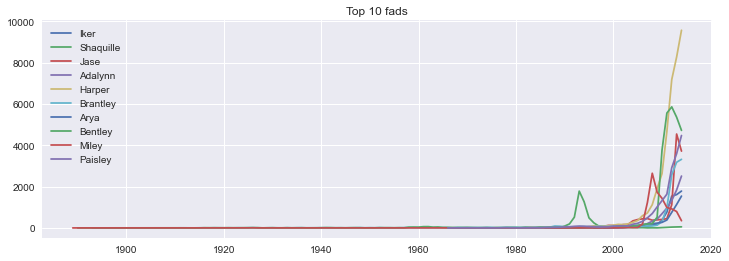

In [39]:
# plot 10 recent fads
for sex, name in fads:
    plot_name(sex, name)

plt.legend([name for sex, name in fads])
plt.title('Top 10 fads');

The above shows the fad names that are popular now. Thus it can't be determined whether the names are fads or if they will remain to be popular.

In [40]:
# compute totals in the last 10 years
total_recent = all_years[all_years['year']>2005].groupby(['sex', 'name'])['number'].sum()
total_recent.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [41]:
# add a condition for spikyness for the names to be less popular in the last 10 years
spiky_common = spikyness[(totals > 5000) & (total_recent < 1000)].copy()
spiky_common.sort_values(ascending=False, inplace=True)
spiky_common.head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

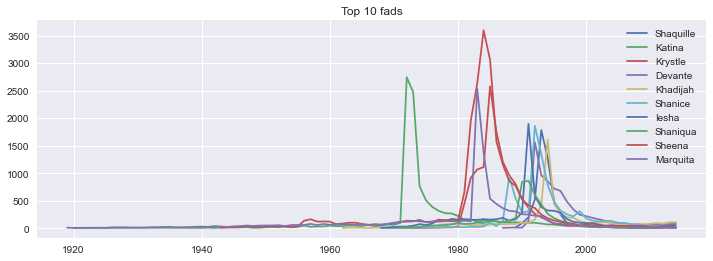

In [42]:
# replot fads to exclude the names popular in the last 10 years
fads = spiky_common.head(10).index.values

for sex, name in fads:
    plot_name(sex, name)

plt.legend([name for sex, name in fads])
plt.title('Top 10 fads');

<br> 

#### Unisex names.
___

In [43]:
# check again the first 5 of totals
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [44]:
# unstack the data to see if the name occurs in both genders
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [45]:
# sum the two collumns together for each name
totals_both = totals_bysex.sum(axis=1)
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [46]:
# find the ratio for each name
ratio = totals_bysex['F'] / totals_bysex['M']
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

The ration is not a number for names that weren't used for both genders.

In [47]:
# create a boolian mask to select unisex names
unisex = (ratio > 0.25) & (ratio < 4)
unisex.head()

name
Aaban        False
Aabha        False
Aabid        False
Aabriella    False
Aadam        False
dtype: bool

In [48]:
# restrict totals by applying unisex mask
totals_both = totals_both[unisex]
totals_both.sort_values(ascending=False, inplace=True)
totals_both.head()

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
dtype: float64

In [49]:
# get the top 10 unisex names 
unisex_names_top10 = totals_both.head(10).index.values
unisex_names_top10

array(['Willie', 'Jordan', 'Taylor', 'Leslie', 'Jamie', 'Angel', 'Lee',
       'Jessie', 'Marion', 'Dana'], dtype=object)

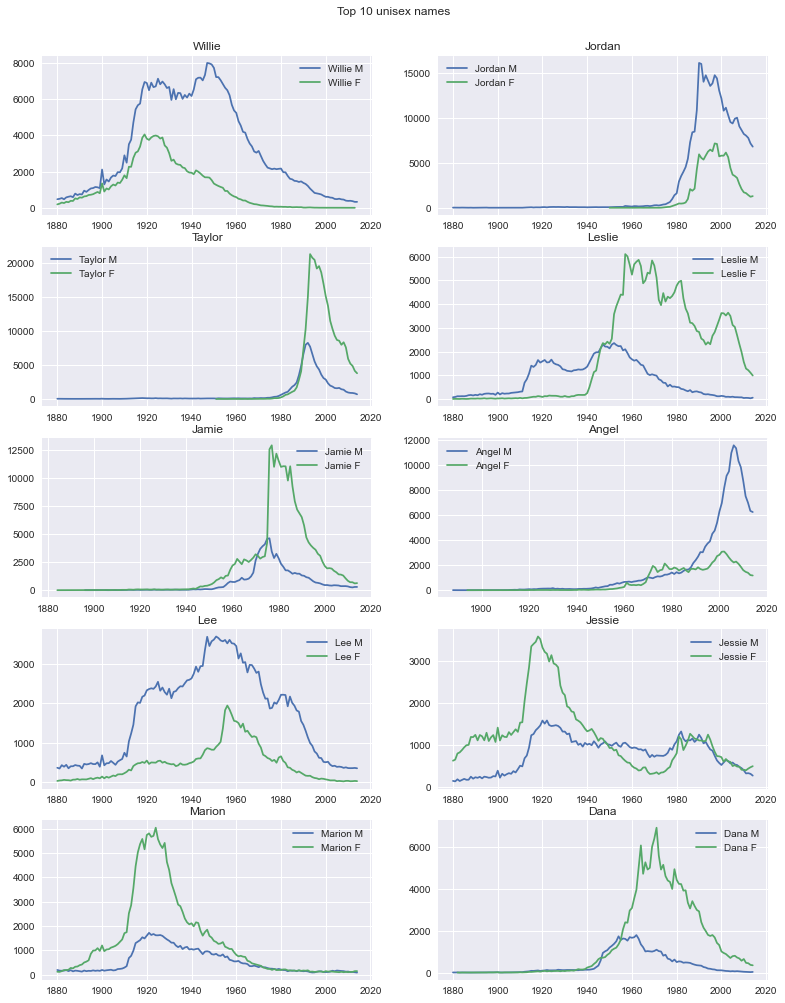

In [50]:
# plot the data for each of those names
plt.figure(figsize=(13, 17))

for i, name in enumerate(unisex_names_top10):
    plt.subplot(5, 2, i+1)
    
    plot_name('M', name)
    plot_name('F', name)
    
    plt.legend([f'{name} M', f'{name} F'])

plt.suptitle('Top 10 unisex names', y=0.92);

<br>

___
#### End.